In [2]:
import numpy as np

def distance(data, c):
    k=len(c)
    n=len(data)
    d=np.zeros([k,n])
    for i in range(k):
        for j in range(n):
            d[i,j]=np.sqrt((c[i,0]-data[j,0])**2+(c[i,1]-data[j,1])**2)
    return d

In [3]:
import pandas as pd

df=pd.read_csv('xy.csv')
data=np.array(df)
c=np.array([[1,1],[2,1],[3,1]])
c=np.array(c,dtype='float64')

import copy

eq=0
iter=1

while eq!=1:
    print('iteration = ',iter)
    c_old=copy.deepcopy(c)
    D=distance(data,c)
    G=np.argmin(D,0)
    k=len(c)

    for i in range(k):
        datai=[data[j] for j in range(len(data)) if G[j]==i]
        c[i]=np.mean(datai,0)
        
    eq=np.mean(np.equal(c,c_old))
    iter+=1
    print(G)

iteration =  1
[1 2 0 ... 2 2 2]
iteration =  2
[1 1 1 ... 2 2 2]
iteration =  3
[1 1 0 ... 2 2 2]
iteration =  4
[0 1 0 ... 2 2 2]
iteration =  5
[0 1 0 ... 2 2 2]
iteration =  6
[0 1 0 ... 2 2 2]
iteration =  7
[0 1 0 ... 2 2 1]
iteration =  8
[0 0 0 ... 1 2 1]
iteration =  9
[0 0 0 ... 1 1 1]
iteration =  10
[0 0 0 ... 1 1 1]
iteration =  11
[0 0 0 ... 1 1 1]
iteration =  12
[0 0 0 ... 1 1 1]


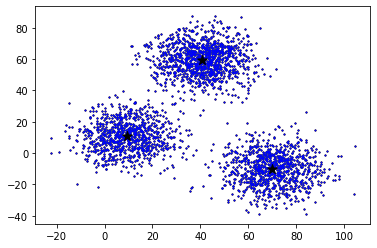

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
colors=['r','g','b','y','c','m','purple','gray','pink']
k=len(c)
for i in range(k):
    datai = np.array([data[j] for j in range(len(data)) if G[j]==i])
    plt.scatter(data[:,0], data[:,1], c=colors[i], s=1)
plt.scatter(c[:,0], c[:,1], marker='*', c='black', s=100)